In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
import keras

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

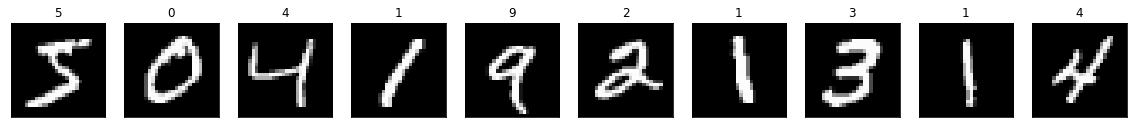

In [3]:
fig,axes = plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

Here trainable parameters are **weights and bias** and here we have 7965 parameters to train

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


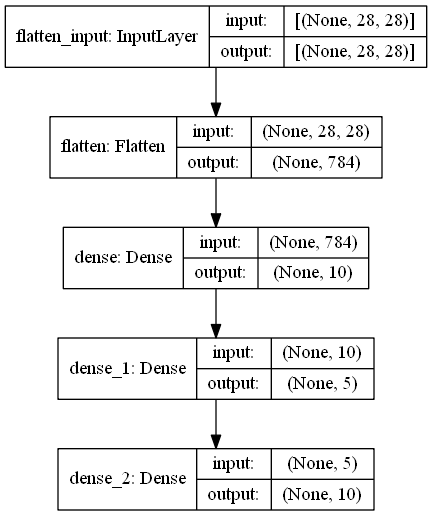

In [7]:
# Show us how the model structure looks like
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [10]:
model.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Epoch 1/40
1875/1875 [==============================] - 9s 3ms/step - loss: 1.7840 - acc: 0.4410 - val_loss: 1.3596 - val_acc: 0.6464
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1952 - acc: 0.6493 - val_loss: 1.0616 - val_acc: 0.6763
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9619 - acc: 0.7092 - val_loss: 0.8726 - val_acc: 0.7471
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8444 - acc: 0.7269 - val_loss: 0.7981 - val_acc: 0.7337
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7970 - acc: 0.7362 - val_loss: 0.7362 - val_acc: 0.7514
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7416 - acc: 0.7560 - val_loss: 0.7019 - val_acc: 0.7705
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7210 - acc: 0.7702 - val_loss: 0.6796 - val_acc: 0.7895
Epoch 8/40
1875/1875 [==============================] - 6s 3ms

In [9]:
model.save('mnist_model.h5')

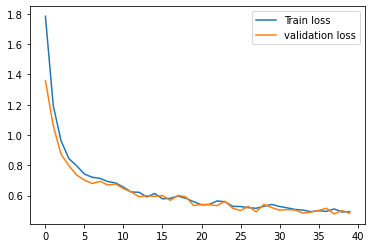

In [12]:
plt.plot(model.history.history['loss'],label='Train loss')
plt.plot(model.history.history['val_loss'],label='validation loss')
plt.legend()

If the loss and val_loss graph is close to each other it means that the model is neither underperforming nor overfit

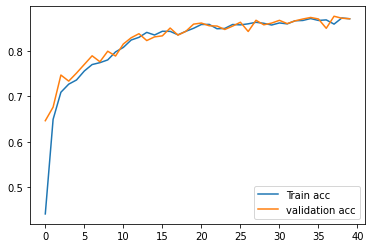

In [13]:
plt.plot(model.history.history['acc'],label='Train acc')
plt.plot(model.history.history['val_acc'],label='validation acc')
plt.legend()

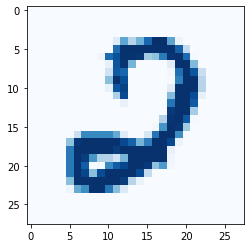

In [22]:
model = keras.models.load_model('mnist_model.h5')
plt.imshow(x_test[400],cmap='Blues')

In [27]:
x = np.reshape(x_test[400],(1,28,28))
np.argmax(model.predict(x))

8